## Import Data

In [135]:
import requests

url = "https://github.com/pddasig/Machine-Learning-Competition-2020/raw/master/Data3_1_2020.zip"
response = requests.get(url)
with open("Data3_1_2020.zip", "wb") as f:
    f.write(response.content)

Extract Training Data

In [136]:
# Extract training data

import zipfile
with zipfile.ZipFile('Data3_1_2020.zip', 'r') as zipf:
    zipf.extract('train.csv')

Import pandas

In [137]:
import pandas as pd

In [138]:
# load data from CSV file

logs = pd.read_csv('train.csv')
logs.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [139]:
# data information
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     30143 non-null  float64
 1   CNC     30143 non-null  float64
 2   GR      30143 non-null  float64
 3   HRD     30143 non-null  float64
 4   HRM     30143 non-null  float64
 5   PE      30143 non-null  float64
 6   ZDEN    30143 non-null  float64
 7   DTC     30143 non-null  float64
 8   DTS     30143 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [140]:
# data attributes
logs.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


In [141]:
#Count the number of missing values
num_missing = logs.eq(-999).sum()
print(num_missing)

CAL      510
CNC      735
GR       254
HRD      385
HRM      385
PE       679
ZDEN     681
DTC     4054
DTS     4865
dtype: int64


In [142]:
# Replace all -999 values with NaN
import numpy as np
logs.replace(-999, np.nan, inplace=True)

In [143]:
logs.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,29633.000000,29408.000000,29889.000000,29758.000000,29758.000000,29464.000000,29462.000000,26089.000000,25278.000000
mean,8.654281,0.683437,47.780541,16.953912,14.492077,5.173227,2.393818,91.814381,180.655730
std,1.749145,30.689679,51.377519,349.067878,445.361622,4.781088,0.196276,24.337910,81.141960
min,5.930400,-0.102800,-0.146000,0.054100,0.061600,-0.023200,-1.923800,49.970500,80.580400
25%,8.135600,0.127100,18.026100,0.740450,0.734700,0.054200,2.234800,71.357000,129.446625
50%,8.625000,0.198500,37.082200,1.662750,1.665150,5.042500,2.439600,85.237600,144.593050
75%,9.063000,0.343100,58.532800,3.180350,3.308900,7.949700,2.553000,112.112600,191.475125
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


In [144]:
# correlation matrix
correlation_matrix = logs.corr()
print(correlation_matrix)

           CAL       CNC        GR       HRD       HRM        PE      ZDEN  \
CAL   1.000000  0.008627  0.020375 -0.009225 -0.005003  0.163847 -0.358636   
CNC   0.008627  1.000000 -0.003242 -0.000660 -0.000410  0.017042 -0.008152   
GR    0.020375 -0.003242  1.000000  0.031601  0.037300 -0.035093 -0.152755   
HRD  -0.009225 -0.000660  0.031601  1.000000  0.497020  0.010584 -0.012363   
HRM  -0.005003 -0.000410  0.037300  0.497020  1.000000 -0.000947 -0.004957   
PE    0.163847  0.017042 -0.035093  0.010584 -0.000947  1.000000 -0.335354   
ZDEN -0.358636 -0.008152 -0.152755 -0.012363 -0.004957 -0.335354  1.000000   
DTC   0.585637  0.008636  0.355556 -0.426659 -0.002028  0.477204 -0.731694   
DTS   0.681271  0.048946  0.233226 -0.009533 -0.005334  0.440085 -0.670186   

           DTC       DTS  
CAL   0.585637  0.681271  
CNC   0.008636  0.048946  
GR    0.355556  0.233226  
HRD  -0.426659 -0.009533  
HRM  -0.002028 -0.005334  
PE    0.477204  0.440085  
ZDEN -0.731694 -0.670186  
DTC

## Exploring the Dataset

### Column Meanings

| Key | Description | Unit |
|-----|-------------|------|
| **CAL** | Caliper log | inch |
| **CNC** | Neutron log  | dec  |
| **GR**  | Gamma Ray log | API |
| **HRD** | Deep Resistivity log | Ohm per meter |
| **HRM** | Medium Resistivity log  | Ohm per meter |
| **PE**  | Photo-Electric Factor log | Barn |
| **ZDEN**| Density log | grams per cubic meter |
| **DTC** | Compressional Travel-time log | nanosecond per foot |
| **DTS** | Shear Travel-time log | nanosecond per foot |

Values set to -999 mark missing values.

### Plot the logs

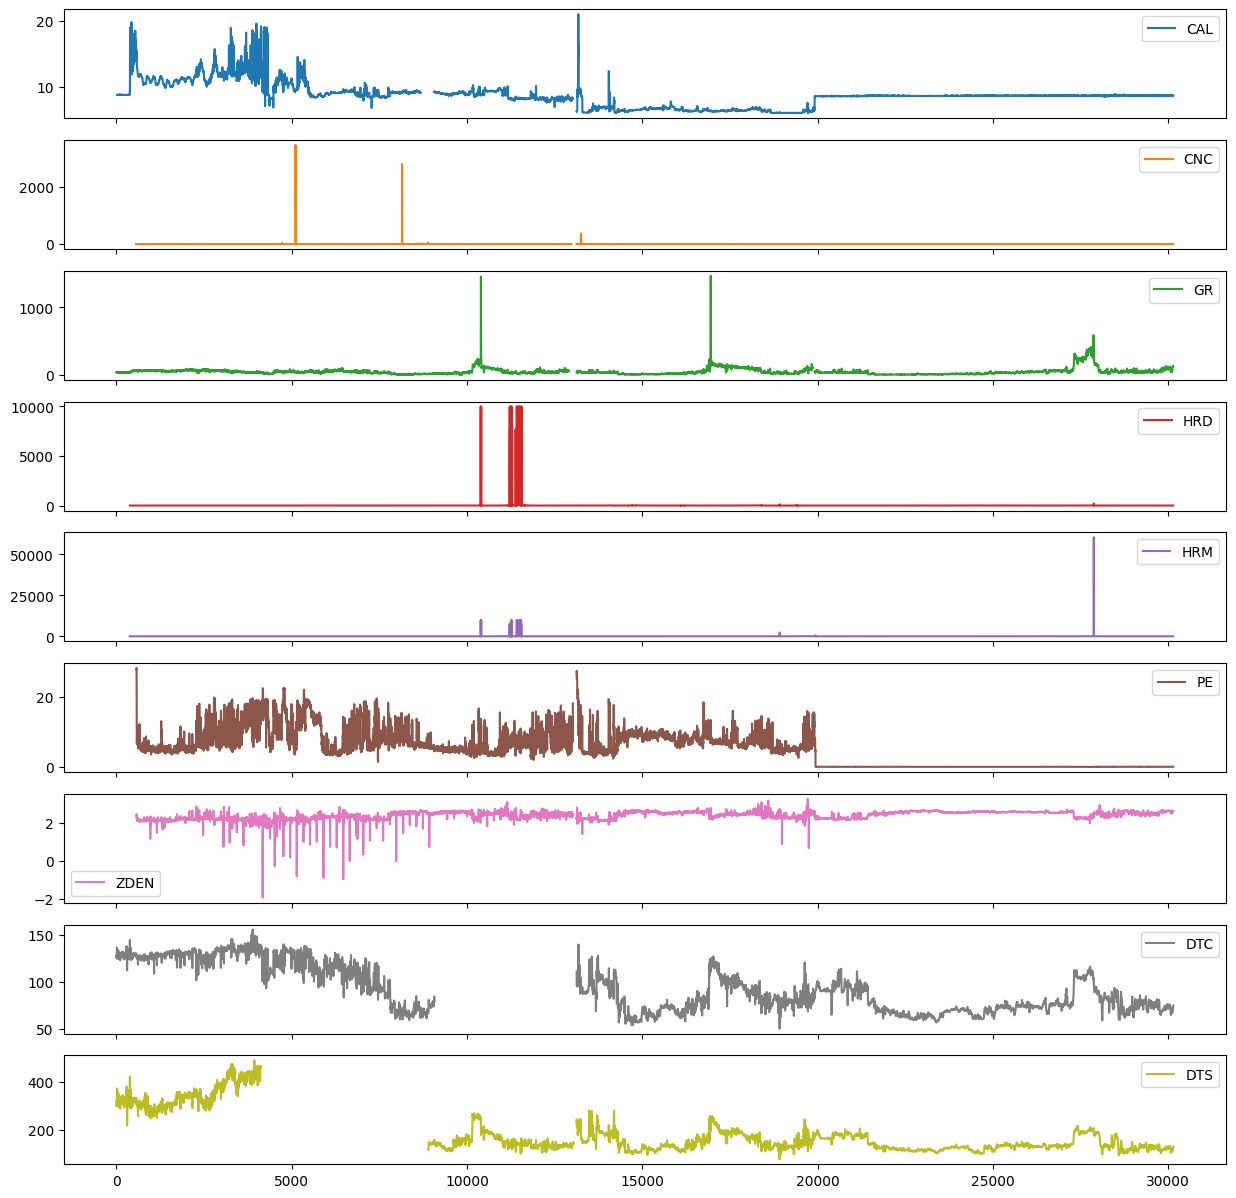

In [145]:
import matplotlib.pyplot as plt

logs.plot(subplots=True,figsize=(15,15))
plt.show()

### CAL

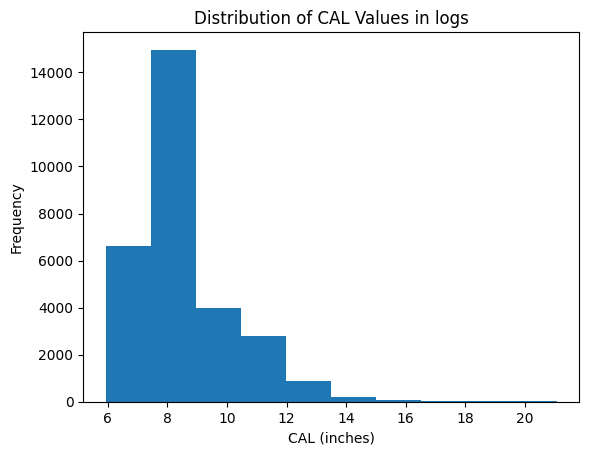

In [146]:
import matplotlib.pyplot as plt
#Interpret the amount of CAL values in the typical range of 7-7/8 to 12 inches

# Create the histogram for 'CAL' column to visualize the distribution
plt.hist(logs['CAL'])
plt.xlabel('CAL (inches)')
plt.ylabel('Frequency')
plt.title('Distribution of CAL Values in logs')
plt.show()

In [147]:
#Look at only observations with CAL values in the typical range
typical_range = (logs['CAL'] >= 7.875) & (logs['CAL'] <= 12)
cal_typical = logs[typical_range]
cal_typical.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,21604.000000,21193.000000,21506.000000,21239.000000,21239.000000,21229.000000,21229.000000,17776.000000,17200.000000
mean,9.064971,0.843648,47.755074,22.765201,19.221107,4.103963,2.392827,92.544349,177.884679
std,0.926673,36.145873,52.352991,413.037421,526.811009,4.854878,0.197652,24.926190,78.969239
min,7.877600,-0.102800,-0.146000,0.054100,0.061600,-0.023200,-0.946000,56.382300,96.900500
25%,8.578100,0.125300,21.936975,0.783400,0.775750,0.050100,2.232100,70.876575,128.020950
50%,8.625000,0.194500,38.451900,1.753100,1.797900,3.691200,2.436800,86.229750,140.641700
75%,9.158100,0.362800,57.423125,3.209800,3.481700,6.592800,2.555900,116.074075,188.999125
max,11.999000,3490.158200,1458.472400,10000.000000,60467.761700,22.417000,3.096600,155.980300,482.606600


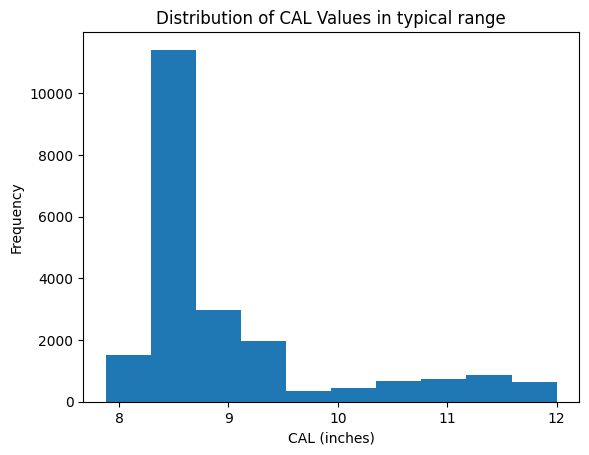

In [148]:
# Create the histogram for 'CAL' column to visualize the distribution in the typical range
plt.hist(cal_typical['CAL'])
plt.xlabel('CAL (inches)')
plt.ylabel('Frequency')
plt.title('Distribution of CAL Values in typical range')
plt.show()

### CNC

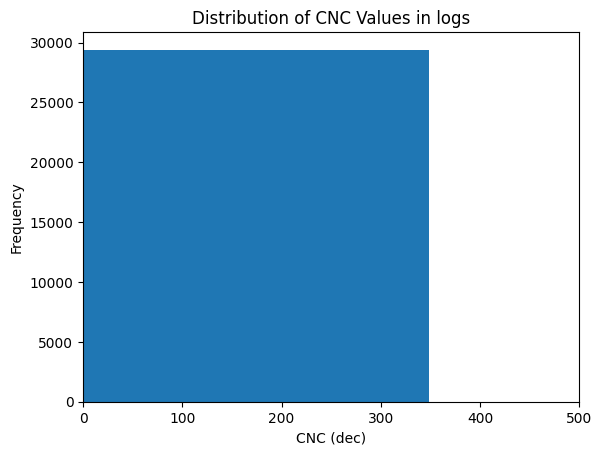

In [149]:
# Create the histogram for 'CNC' column to visualize the distribution
plt.hist(logs['CNC'])
plt.xlabel('CNC (dec)')
plt.ylabel('Frequency')
plt.title('Distribution of CNC Values in logs')
plt.xlim(0,500)
plt.show()

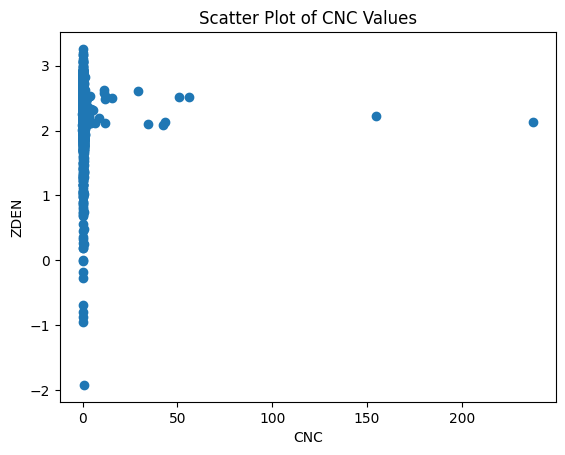

In [150]:
# Refine dataframe to exclude CNC outliers
CNC_ref = logs[logs['CNC'] < 350]

plt.scatter(CNC_ref['CNC'], CNC_ref['ZDEN'])
plt.xlabel('CNC')
plt.ylabel('ZDEN')
plt.title('Scatter Plot of CNC Values')
plt.show()

### GR

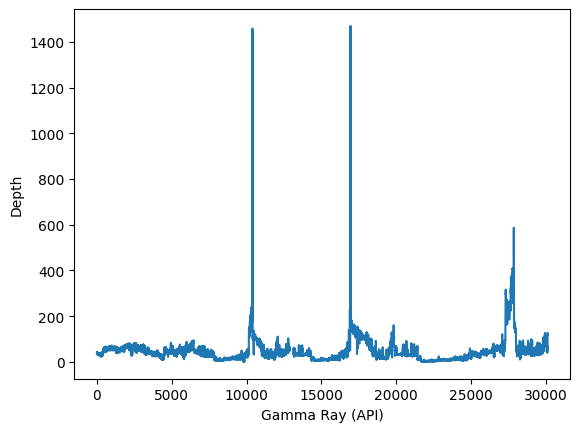

In [151]:
# plot the GR log
plt.plot(logs['GR'])
plt.ylabel('Depth')
plt.xlabel('Gamma Ray (API)')
plt.show()

### HRM v. CNC and HRD v. CNC Plots

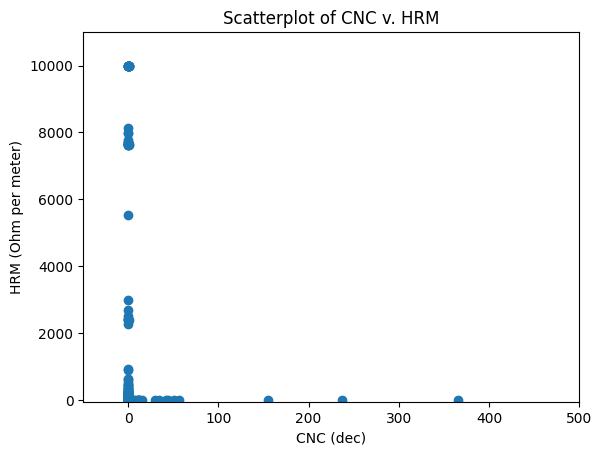

In [152]:
# plot the relationship between CNC and HRM - Since resistivity is a function of porosity which is measured in CNC
plt.scatter(logs['CNC'], logs['HRM'])
plt.xlabel('CNC (dec)')
plt.ylabel('HRM (Ohm per meter)')
plt.xlim(-50,500)
plt.ylim(-50,11000)
plt.title('Scatterplot of CNC v. HRM')
plt.show()

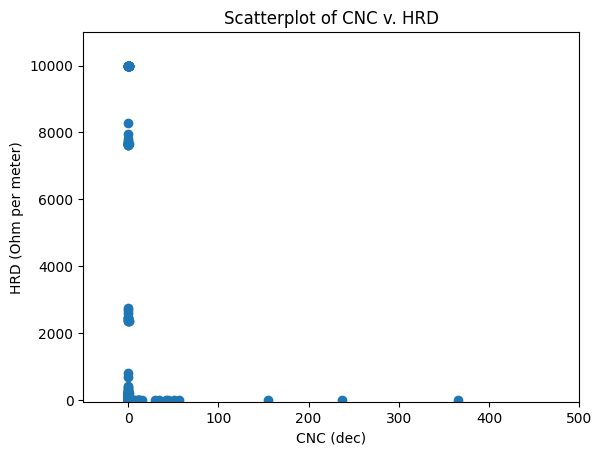

In [153]:
# plot the relationship between CNC and HRD - Since resistivity is a function of porosity which is measured in CNC
plt.scatter(logs['CNC'], logs['HRD'])
plt.xlabel('CNC (dec)')
plt.ylabel('HRD (Ohm per meter)')
plt.xlim(-50,500)
plt.ylim(-50,11000)
plt.title('Scatterplot of CNC v. HRD')
plt.show()

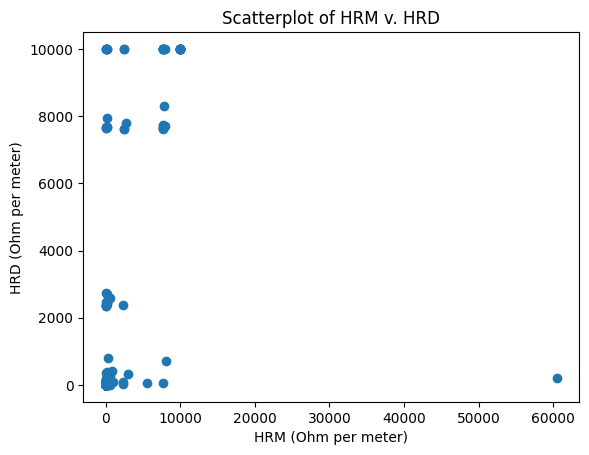

In [154]:
# plot the relationship between HRM and HRD

plt.scatter(logs['HRM'], logs['HRD'])
plt.xlabel('HRM (Ohm per meter)')
plt.ylabel('HRD (Ohm per meter)')
plt.title('Scatterplot of HRM v. HRD')
plt.show()

### PE

In [155]:
#Determine whether ZDEN and PE have a linear relationship. ZDEN is a measure of density and PE is a newer density log with added features.
correlation = logs['ZDEN'].corr(logs['PE'])
print(correlation)

#There is not a high positive or negative correlation between the two, so they do not have a linear relationship

-0.3353536520319314


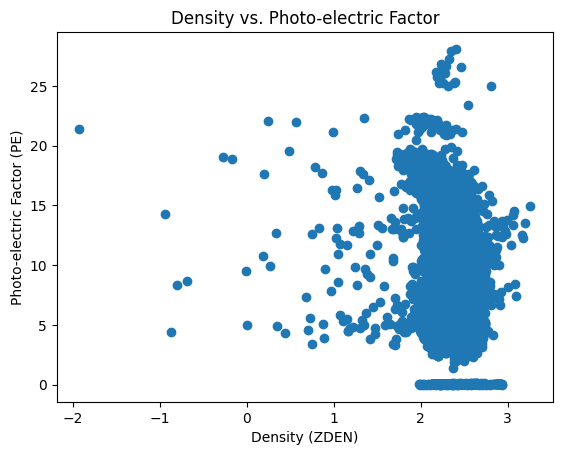

In [156]:
# Plot the relationship between ZDEN and PE
plt.scatter(logs['ZDEN'], logs['PE'])
plt.xlabel('Density (ZDEN)')
plt.ylabel('Photo-electric Factor (PE)')
plt.title('Density vs. Photo-electric Factor')
plt.show()

### DTC and DTS

In [157]:
#Count the repetitions of each value in DTC
value_counts = logs['DTC'].value_counts(dropna=False)  # Include NaN with value_counts=False

#Put into a DF
# Create DataFrame from value_counts
value_countsdf = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values})

# Print the DataFrame
value_countsdf

,value,count
0,NaN,4054
1,77.6880,4
2,129.6107,3
3,73.4193,3
4,91.1938,3
...,...,...
25579,61.9952,1
25580,62.6319,1
25581,63.3650,1
25582,64.2771,1


Text(0.5, 1.0, 'Frequency of DTC Values')

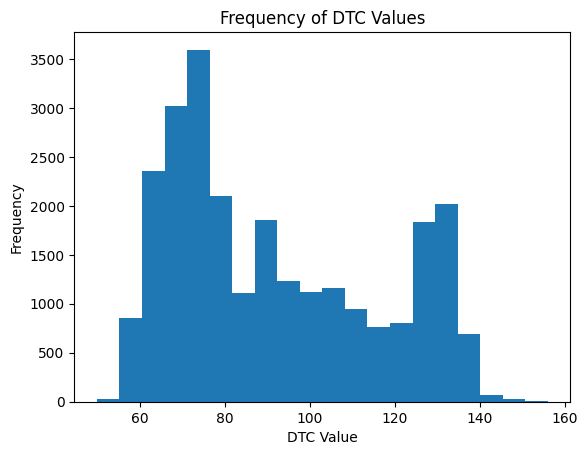

In [158]:
from matplotlib import pyplot as plt

plt.hist(value_countsdf['value'], bins=20)
plt.xlabel("DTC Value")
plt.ylabel("Frequency")
plt.title("Frequency of DTC Values")

## Attempt to predict compressional sonic from density

We will start by selecting only two logs (ZDEN and DTC) and will attempt to predict one from the other using a simple linear regression. The attempt may not succeed but it will illustrate the general setup of the problem.

First, let us drop missing or anomalous values and examine the data distribution.

In [159]:
# select two logs
two = logs.loc[:, ('ZDEN', 'DTC')]
# replace -999 with NaN
two.replace(-999, np.nan, inplace=True)
# drop rows with NaN
two.dropna(inplace=True)
# data information
two.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25516 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25516 non-null  float64
 1   DTC     25516 non-null  float64
dtypes: float64(2)
memory usage: 598.0 KB


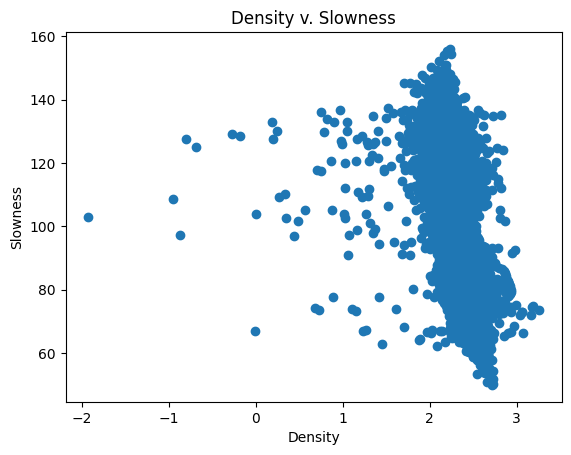

In [160]:
# display scatter plot to identify outliers

plt.scatter(two.ZDEN, two.DTC)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('Density v. Slowness')
plt.show()

In [161]:
# remove anomalous density values
two2 = two.loc[(two.ZDEN > 1.5) & (two.ZDEN < 3.1)]
two2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25442 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    25442 non-null  float64
 1   DTC     25442 non-null  float64
dtypes: float64(2)
memory usage: 596.3 KB


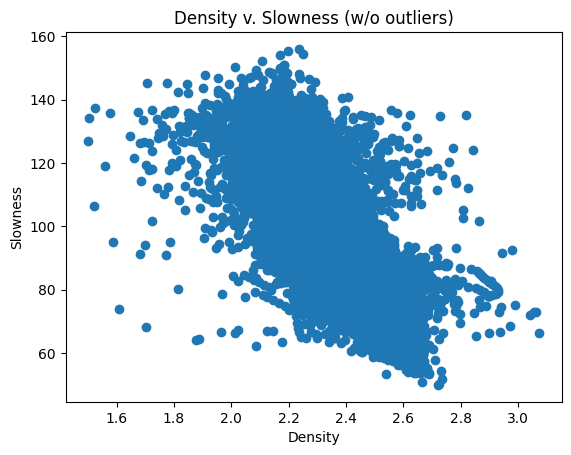

In [162]:
# scatterplot without outliers

plt.scatter(two2.ZDEN, two2.DTC)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('Density v. Slowness (w/o outliers)')
plt.show()

The dependence is not simple but we can observe a general trend of slowness decreasing with density. Next, we will try to approximate this dependence with a straight line by using *linear regression*, a classic tool from statistics.

How do we know if our model works? We can divide the data in two parts: training and testing. We can then use the training part to fit the model and the testing part to validate the result. We will select 80% of the data for training and the remaining 20% for validation.

In [163]:
# divide data with outliers into training and testing
select = np.random.rand(len(two)) < 0.8
train = two[select]
test = two[~select]

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20486 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20486 non-null  float64
 1   DTC     20486 non-null  float64
dtypes: float64(2)
memory usage: 480.1 KB


In [164]:
# divide data without outliers into training and testing
select2 = np.random.rand(len(two2)) < 0.8
train2 = two2[select2]
test2 = two2[~select2]

train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20302 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20302 non-null  float64
 1   DTC     20302 non-null  float64
dtypes: float64(2)
memory usage: 475.8 KB


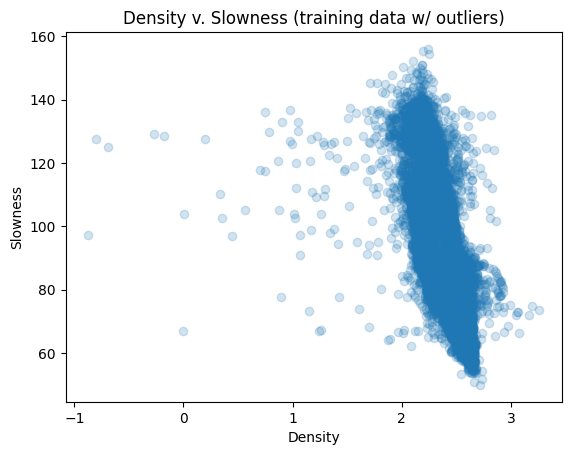

In [165]:
# plot the training data with outliers

plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('Density v. Slowness (training data w/ outliers)')
plt.show()

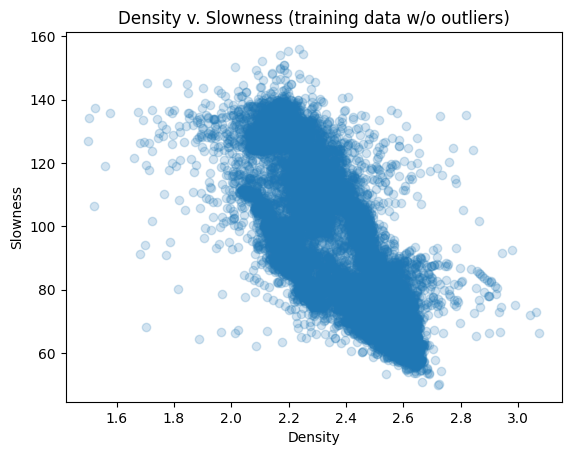

In [166]:
# plot the training data without outliers

plt.scatter(train2.ZDEN, train2.DTC, alpha=0.2)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('Density v. Slowness (training data w/o outliers)')
plt.show()

## Linear Regression

In [167]:
# create models
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear2 = linear_model.LinearRegression()

#train model with outliers
linear.fit(train[['ZDEN']], train['DTC'])
# train model without outliers
linear2.fit(train2[['ZDEN']], train2['DTC'])


LinearRegression()

Our first model has only two parameters: the intercept $a$ and the slope $b$ and in the equation
$$s(\rho)=a+b\,\rho\;.$$
Fitting the model means estimating these parameters from the data.

In [168]:
# regression coefficients w/ outliers
print('Regression Coefficients w/ Outliers')
print('Intercept: ', linear.intercept_)
print('Coefficients: ', linear.coef_)
print('\n')
# regression coefficients w/o outliers
print('Regression Coefficients w/o Outliers')
print('Intercept: ', linear2.intercept_)
print('Coefficients: ', linear2.coef_)

Regression Coefficients w/ Outliers
Intercept:  301.6254962740874
Coefficients:  [-88.26680283]


Regression Coefficients w/o Outliers
Intercept:  342.09051418496773
Coefficients:  [-105.09245594]


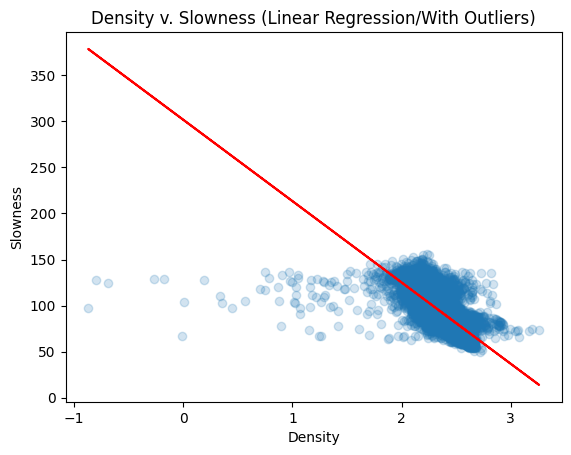

In [169]:
#plot training data (w/ outliers) with linear regression

plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
plt.plot(train.ZDEN, linear.intercept_ +
        train.ZDEN*linear.coef_[0], '-r')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('Density v. Slowness (Linear Regression/With Outliers)')
plt.show()

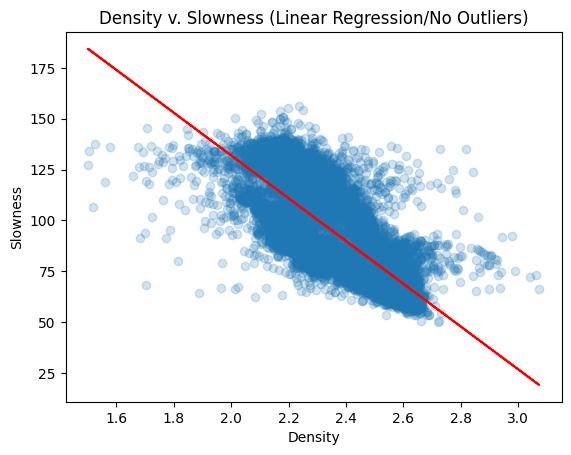

In [170]:
#plot training data (w/o outliers) with linear regression line

plt.scatter(train2.ZDEN, train2.DTC, alpha=0.2)
plt.plot(train2.ZDEN, linear2.intercept_ +
        train2.ZDEN*linear2.coef_[0], '-r')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('Density v. Slowness (Linear Regression/No Outliers)')
plt.show()

Now we can turn to the testing data and see how well our model predicts it.

There are different ways to measure the error. If $p_n$ are predicted values, and $v_n$ are actual values, the classic linear regression is using the least-squares misfit $\displaystyle \sum_{n=1}^{N} (p_n - v_n)^2$.

The root-mean-square error is defined as $\displaystyle  \sqrt{\frac{1}{N} \sum_{n=1}^{N} (p_n - v_n)^2}$.


In [171]:
# evaluate prediction error for w/ outliers
from sklearn.metrics import mean_squared_error
want = test['DTC']
get = linear.predict(test[['ZDEN']])

print('Linear Regression Prediction Error for Data with Outliers')
print("RMS error: %.3f" % np.sqrt(np.mean((get-want)**2)))
print("RMS error: %.3f" % mean_squared_error(get, want,
                                             squared=False))
print('\n')

want2 = test2['DTC']
get2 = linear2.predict(test2[['ZDEN']])
# evaluate prediction error for w/o outliers
print('Linear Regression Prediction Error for Data without Outliers')
print("RMS error: %.3f" % np.sqrt(np.mean((get2-want2)**2)))
print("RMS error: %.3f" % mean_squared_error(get2, want2,
                                             squared=False))

Linear Regression Prediction Error for Data with Outliers
RMS error: 17.240
RMS error: 17.240


Linear Regression Prediction Error for Data without Outliers
RMS error: 14.300
RMS error: 14.300


The RMSE for the data with and without outliers returns different values because outliers can influence the estimation of coefficients. The plots for each appear different, due to different data. We see a much more zoomed out scatterplot for the data including outliers because it must fit all of the points as opposed to the data without the anomalous values excluding those points and depicting a central cluster.

## Huber Regressor

"L2-regularized linear regression model that is robust to outliers. The Huber loss function has the advantage of not being heavily influenced by the outliers while not completely ignoring their effect."

The Huber Regressor has it's own loss function and utilizes a combination of L1 and L2 loss functions. L1 regularization (or Lasso) is the sum of the absolute values and is referred to as the Manhattan distance. L2 regularization (or Ridge) is the sum of the squares and is referred to as the Euclidean distance.

Want to use the Huber Regressor on the training and testing data from above - we split the data with outliers into train and test and also split the data without outliers into train2 and test2.

Sklearn.linear_model.Huberregressor. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html

In [172]:
# import the Huber Regressor

from sklearn.linear_model import HuberRegressor

In [173]:
# create and fit the Huber Regressor for data with outliers
huber = HuberRegressor(epsilon=1.35)  # Adjust epsilon as needed
huber.fit(train[['ZDEN']], train['DTC'])

#create and fit the Huber Regressor for data without outliers
huber2 = HuberRegressor(epsilon=1.35) #Adjust epsilon as needed
huber2.fit(train2[['ZDEN']], train2['DTC'])

HuberRegressor()

In [174]:
# Huber coefficients w/ outliers
print('Huber Regressor Coefficients w/ Outliers')
print('Intercept: ', huber.intercept_)
print('Coefficients: ', huber.coef_)
print('\n')
# Huber coefficients w/o outliers
print('Huber Regressor Coefficients w/o Outliers')
print('Intercept: ', huber2.intercept_)
print('Coefficients: ', huber2.coef_)

Huber Regressor Coefficients w/ Outliers
Intercept:  345.9332906791097
Coefficients:  [-107.02501454]


Huber Regressor Coefficients w/o Outliers
Intercept:  355.3459864392039
Coefficients:  [-110.86513426]


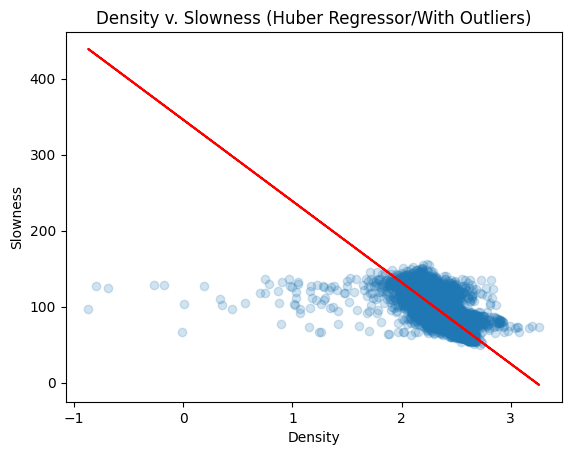

In [175]:
#plot training data (w/ outliers) with huber regressor

plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
plt.plot(train.ZDEN, huber.intercept_ +
        train.ZDEN*huber.coef_[0], '-r')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('Density v. Slowness (Huber Regressor/With Outliers)')
plt.show()

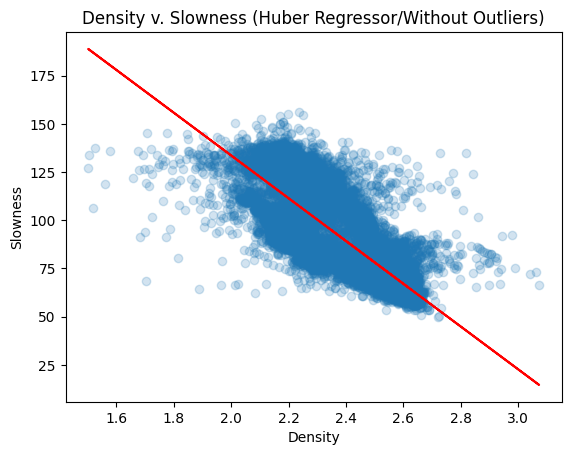

In [176]:
#plot training data (w/o outliers) with huber regressor

plt.scatter(train2.ZDEN, train2.DTC, alpha=0.2)
plt.plot(train2.ZDEN, huber2.intercept_ +
        train2.ZDEN*huber2.coef_[0], '-r')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('Density v. Slowness (Huber Regressor/Without Outliers)')
plt.show()

In [177]:
#predict data using huber model, use testing data to see how well the model works
want = test['DTC']
get = huber.predict(test[['ZDEN']])

print('Huber Regressor Prediction Error for Data with Outliers')
print("RMS error: %.3f" % np.sqrt(np.mean((get-want)**2)))
print("RMS error: %.3f" % mean_squared_error(get, want,
                                             squared=False))
print('\n')

want2 = test2['DTC']
get2 = huber2.predict(test2[['ZDEN']])
# evaluate prediction error for w/o outliers
print('Huber Regressor Prediction Error for Data without Outliers')
print("RMS error: %.3f" % np.sqrt(np.mean((get2-want2)**2)))
print("RMS error: %.3f" % mean_squared_error(get2, want2,
                                             squared=False))

Huber Regressor Prediction Error for Data with Outliers
RMS error: 18.176
RMS error: 18.176


Huber Regressor Prediction Error for Data without Outliers
RMS error: 14.378
RMS error: 14.378


The Huber Regressor produces almost identical scatter plots to those of linear regression.

The robustness of Huber Regressor is beneficial because that means we do not need to clean the data as much as with the use of a different model.

## Neural Networks

To analyze the prediction error of a Neural Network, I chose to use a model created by one of the submissions for the SPWLA PDDA’s 1st Petrophysical Data-Driven Analytics Contest. This specific model was developed by the team named 'UTFE' which was composed of four UT Austin students. The model was called "model_1", but in my adapted code we will call it "NN"

In [178]:
#install packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [179]:
#introduce UTFE's "model_1" as "NN", adapt to have one output layer

NN = Sequential([
     Dense(24, activation='relu', input_shape=(1,)),
     Dense(12, activation='relu'),
     Dense(1),
     ])

NN2 = Sequential([
     Dense(24, activation='relu', input_shape=(1,)),
     Dense(12, activation='relu'),
     Dense(1),
     ])

## Blackbox
**Look at the Neural Network as a blackbox**

In [180]:
#weights and biases

weights = []
biases = []

for layer in NN.layers:
    weights.append(layer.get_weights()[0])  # weights
    biases.append(layer.get_weights()[1])   # biases

# Print weights and biases for each layer
for i, (w, b) in enumerate(zip(weights, biases)):
    print(f"Layer {i+1}:")
    print("Weights:")
    print(w)
    print("Biases:")
    print(b)

Layer 1:
Weights:
[[ 0.23497674 -0.30358446 -0.48209554 -0.12823498  0.27446976 -0.1227048
   0.23080334 -0.03368348 -0.1447325   0.4211273  -0.3392018  -0.41087335
  -0.4499677  -0.07472855  0.22539815 -0.02593163 -0.35123312 -0.33885443
  -0.21414581 -0.41154867 -0.34086576  0.35298595 -0.3714353  -0.19373149]]
Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Layer 2:
Weights:
[[-1.14642382e-01 -3.54739428e-02  3.94760370e-01  3.52127314e-01
  -3.29078794e-01 -4.06259000e-01 -1.67292967e-01  1.54566050e-01
  -3.37939501e-01  5.05015552e-02  1.07942581e-01  3.46404731e-01]
 [ 2.51063883e-01  3.30681860e-01 -6.93065524e-02 -1.79209411e-02
   9.84232426e-02 -2.12867662e-01 -1.29342377e-02  2.00270414e-02
   2.70812809e-01  3.27102721e-01  1.90125465e-01 -8.48490000e-03]
 [-1.67293176e-01  2.31833875e-01 -3.79532248e-01 -4.08016652e-01
  -2.63401508e-01  4.04368043e-02 -5.85511625e-02  9.53257084e-02
  -3.32278550e-01  2.07622051e-02 -1.75124168e-01  3.93

I recognize that all of the biases are zero. This will not necessarily remain the same throughout training, but this means there is no bias toward a particular outcome. Now, we want to look at the neural networks prediction error for each set of data (with outliers and without outliers) in terms of the metric "mse".

*Initially I thought that it would be beneficial* - Since a neural network is not a linear model, we can not derive an intercept and coefficient. However, we can hone in on the weights and biases for each layer of our neural net.

*I then realized that it is difficult to interpret long arrays of weights and biases, better to look at the neural net as a blackbox.*

## Plotting NN Model

In [181]:
from sklearn.preprocessing import RobustScaler

# scaling
X = train[['ZDEN']]
y = train[['DTC']]
X2 = train2[['ZDEN']]
y2 = train2[['DTC']]

# robust scaler from sklearn for data w/ outliers
xscaler = RobustScaler()
xscaler.fit(X)
Xs = xscaler.transform(X)

yscaler = RobustScaler()
yscaler.fit(y)
ys = yscaler.transform(y)

# scaling
X2 = train2[['ZDEN']]
y2 = train2[['DTC']]

# robust scaler from sklearn for data w/o outliers
xscaler2 = RobustScaler()
xscaler2.fit(X2)
Xs2 = xscaler2.transform(X2)

yscaler2 = RobustScaler()
yscaler2.fit(y2)
ys2 = yscaler2.transform(y2)

#scale the test set
X_test = test[['ZDEN']]
y_test = test[['DTC']]
X_test2 = test2[['ZDEN']]
y_test2 = test2[['DTC']]

# robust scaler from sklearn for testing data w/ outliers
xtscaler = RobustScaler()
xtscaler.fit(X_test)
Xs_test = xtscaler.transform(X_test)

ytscaler = RobustScaler()
ytscaler.fit(y_test)
ys_test = ytscaler.transform(y_test)

# robust scaler from sklearn for testing data w/o outliers
xtscaler2 = RobustScaler()
xtscaler2.fit(X_test2)
Xs2_test = xtscaler2.transform(X_test2)

ytscaler2 = RobustScaler()
ytscaler2.fit(y_test2)
ys2_test = ytscaler2.transform(y_test2)

In [182]:
import math

#compile model

NN.compile(optimizer = 'adam', loss = 'mse')
NN2.compile(optimizer = 'adam', loss = 'mse')

#fit the model
neuralnet = NN.fit(Xs, ys)
neuralnet2 = NN2.fit(Xs2, ys2)

#make predictions

train_pred = yscaler.inverse_transform(NN.predict(Xs))
test_pred = ytscaler.inverse_transform(NN.predict(Xs_test))

train_pred2 = yscaler2.inverse_transform(NN.predict(Xs2))
test_pred2 = ytscaler2.inverse_transform(NN.predict(Xs2_test))

# calculate rmse

test_rmse = math.sqrt(mean_squared_error(test[['DTC']], test_pred))
test_rmse2 = math.sqrt(mean_squared_error(test2[['DTC']], test_pred2))

print('\nNeural Net Prediction Error for Data with Outliers')
print("RMSE:", test_rmse)
print('\nNeural Net Prediction Error for Data without Outliers')
print("RMSE:", test_rmse2)



161/161 [==============================] - 0s 2ms/step

Neural Net Prediction Error for Data with Outliers
RMSE: 14.27962113328995

Neural Net Prediction Error for Data without Outliers
RMSE: 13.86736840382428


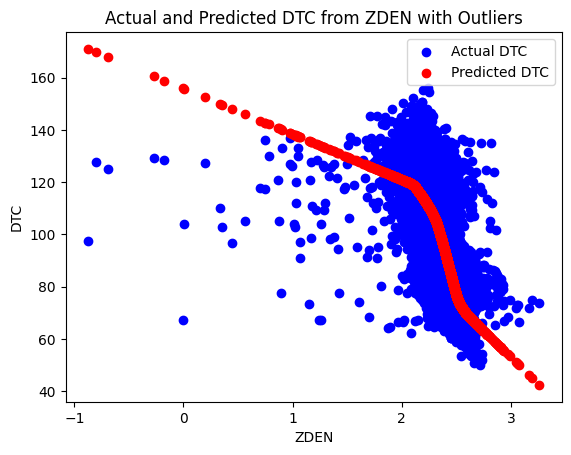

In [183]:
# plot training data with outliers using NN
plt.scatter(X, y, label = "Actual DTC", color = "blue")

# plot predicted data from data with outliers, predicted using NN model
plt.scatter(X, train_pred, label = "Predicted DTC", color = "red")
plt.xlabel("ZDEN")
plt.ylabel("DTC")
plt.title("Actual and Predicted DTC from ZDEN with Outliers")
plt.legend()

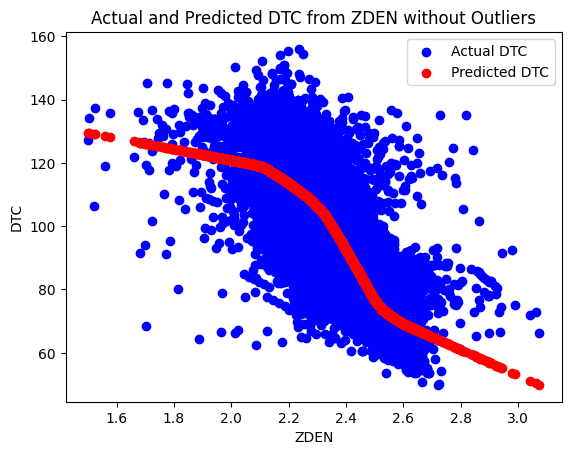

In [184]:
# plot training data without outliers using NN
plt.scatter(X2, y2, label = "Actual DTC", color = "blue")

# plot predicted data from data with outliers, predicted using NN model
plt.scatter(X2, train_pred2, label = "Predicted DTC", color = "red")
plt.xlabel("ZDEN")
plt.ylabel("DTC")
plt.title("Actual and Predicted DTC from ZDEN without Outliers")
plt.legend()

## MLP (Multi-Layer Perceptron) Regressor on Neural Network

In [185]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler

In [186]:
# scaling
X = train[['ZDEN']]
y = train[['DTC']]
X2 = train2[['ZDEN']]
y2 = train2[['DTC']]

# robust scaler from sklearn for data w/ outliers
xscaler = RobustScaler()
xscaler.fit(X)
Xs = xscaler.transform(X)

yscaler = RobustScaler()
yscaler.fit(y)
ys = yscaler.transform(y)

# scaling
X2 = train2[['ZDEN']]
y2 = train2[['DTC']]

# robust scaler from sklearn for data w/o outliers
xscaler2 = RobustScaler()
xscaler2.fit(X2)
Xs2 = xscaler2.transform(X2)

yscaler2 = RobustScaler()
yscaler2.fit(y2)
ys2 = yscaler2.transform(y2)

#scale the test set
X_test = test[['ZDEN']]
y_test = test[['DTC']]
X_test2 = test2[['ZDEN']]
y_test2 = test2[['DTC']]

# robust scaler from sklearn for testing data w/ outliers
xtscaler = RobustScaler()
xtscaler.fit(X_test)
Xs_test = xtscaler.transform(X_test)

ytscaler = RobustScaler()
ytscaler.fit(y_test)
ys_test = ytscaler.transform(y_test)

# robust scaler from sklearn for testing data w/o outliers
xtscaler2 = RobustScaler()
xtscaler2.fit(X_test2)
Xs2_test = xtscaler2.transform(X_test2)

ytscaler2 = RobustScaler()
ytscaler2.fit(y_test2)
ys2_test = ytscaler2.transform(y_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


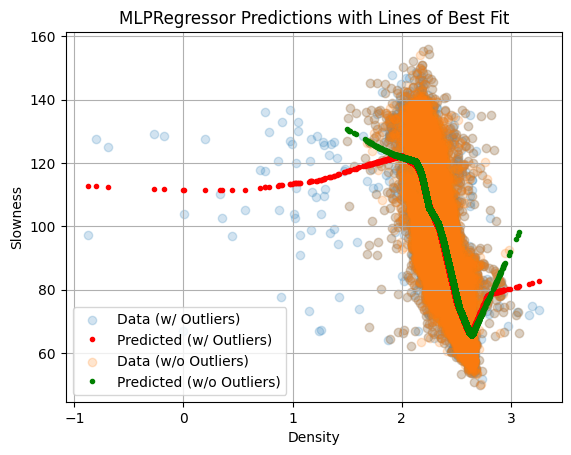

In [187]:
# fit MLPRegressor for set with outliers and set without outliers
mlp = MLPRegressor(hidden_layer_sizes = (24, 12), max_iter=500).fit(Xs, ys)
mlp2 = MLPRegressor(hidden_layer_sizes = (24, 12), max_iter=500).fit(Xs2, ys2)

#make predictions
pred = ytscaler.inverse_transform(np.expand_dims(mlp.predict(Xs_test),-1))

pred2 = ytscaler2.inverse_transform(np.expand_dims(mlp2.predict(Xs2_test),-1))

#Create scatter plot
plt.scatter(X, y, alpha=0.2, label='Data (w/ Outliers)')

# Predicted values for data with outliers (assuming mlp.predict returns a 1D array)
predicted_DTC = ytscaler.inverse_transform(np.expand_dims(mlp.predict(xtscaler.transform(train[['ZDEN']])),-1))
plt.plot(train.ZDEN, predicted_DTC, '.r', label='Predicted (w/ Outliers)')

# Data without outliers
plt.scatter(train2.ZDEN, train2.DTC, alpha=0.2, label='Data (w/o Outliers)')

# Predicted values for data without outliers
predicted_DTC2 = ytscaler2.inverse_transform(np.expand_dims(mlp2.predict(xtscaler2.transform(train2[['ZDEN']])),-1))
plt.plot(train2.ZDEN, predicted_DTC2, '.g', label='Predicted (w/o Outliers)')

# Customize the plot
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.title('MLPRegressor Predictions with Lines of Best Fit')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()

In [188]:
test_rmse = math.sqrt(mean_squared_error(test[['DTC']], pred))
test_rmse2 = math.sqrt(mean_squared_error(test2[['DTC']], pred2))

print('\nMLP Regressor Prediction Error for Data with Outliers')
print("RMSE:", test_rmse)
print('\nMLP Regressor Prediction Error for Data without Outliers')
print("RMSE:", test_rmse2)


MLP Regressor Prediction Error for Data with Outliers
RMSE: 13.849096659212803

MLP Regressor Prediction Error for Data without Outliers
RMSE: 13.64558969364886
